In [1]:
from kan import *
import torch
import matplotlib.pyplot as plt
from torch import autograd
from tqdm import tqdm

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [24]:
# CHEM_SYM = 'LiH'

SEED = 1000

# NUM_VAL_ELECTRONS, SPIN_UP, SPIN_DOWN, RAND_STARTING_POS = mol_scf(CHEM_SYS, RAND_SEED)

NUM_ELECTRONS = 2


In [56]:
# Create a KAN: 
# 5 grid intervals (grid=5).
INPUT_DIM = 2 * NUM_ELECTRONS
ADDITION_DIM = NUM_ELECTRONS
MULT_DIM = NUM_ELECTRONS
OUTPUT_DIM = 1

NUM_RADIAL_FUNCTIONS = 5
NUM_ANGULAR_FUNCTIONS = 5

model = KAN(width=[INPUT_DIM, [0, NUM_ELECTRONS]], 
            grid=5, 
            k=2, 
            seed=SEED, 
            device=device)


f = lambda x: torch.sin(2*(torch.log(x[:,[0]])+torch.log(x[:,[1]])))

dataset = create_dataset(f, n_var=INPUT_DIM, ranges=[0.2,5], device=device)

# train the model
model.fit(dataset, opt="LBFGS", steps=20);

checkpoint directory created: ./model
saving model version 0.0


description:   0%|                                                           | 0/20 [00:00<?, ?it/s]

| train_loss: 3.01e-01 | test_loss: 3.00e-01 | reg: 7.26e+00 | : 100%|█| 20/20 [00:00<00:00, 23.19it

saving model version 0.1


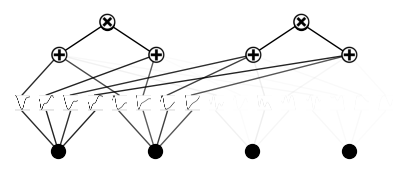

In [57]:
model.plot()

In [49]:
model.fix_symbolic(0,0,0,'log')
model.fix_symbolic(0,1,0,'log')
model.fix_symbolic(1,0,0,'sin')

Best value at boundary.
r2 is 0.9950834512710571
saving model version 0.2
r2 is 0.9944485425949097
saving model version 0.3
r2 is 0.46848443150520325
r2 is not very high, please double check if you are choosing the correct symbolic function.
saving model version 0.4


tensor(0.4685)

In [50]:
model.fit(dataset, opt="LBFGS", steps=20);

| train_loss: nan | test_loss: nan | reg: nan | : 100%|█████████████| 20/20 [00:03<00:00,  5.57it/s]

saving model version 0.5


In [51]:
ex_round(model.symbolic_formula()[0][0], 3)

nan

In [ ]:
"""
TO DO:
    - loss function or update rule that ensures each node has an input
    - how loss will be calculated: VMC/local energy/full SE
    - relaxed configuration input data: pySCF
    - parameters to optimize in radial and angular functions
    - which electrons to use
    - encode pauli exclusion: determinant should resolve
    - what is updated input for ab initio cycle
    - function or orbital basis set
    - experiements: likely psiformer comparison and reference data

GENERAL IDEA:
    1) atomic positions are given by pySCF
    2) number of electrons are given by atomic number/valence info
    3) network nodes are parameterized by electron number n
    4) each node has n functions/connections for one to each electron in the next layer, including a one to itself
    5) radial and angular functions are on the same layer with multiplication at the 
"""